In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('muted')

import warnings
pd.set_option('mode.chained_assignment',  None)
warnings.simplefilter(action='ignore', category=FutureWarning)

---
### Data 
#### IBM HR Analytics Employee Attrition & Performance
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
* Target : Attrition ( 퇴사 여부 )
<br>

* 'Age' 
* 'BusinessTravel' 
* 'DailyRate' 
* 'Department' 
* 'DistanceFromHome' 
* 'Education' 
* 'EducationField'  
* 'EmployeeCount' 
* 'EmployeeNumber' 
* 'EnvironmentSatisfaction' 
* 'Gender'
* 'HourlyRate' 
* 'JobInvolvement'
* 'JobLevel' 
* 'JobRole' 
* 'JobSatisfaction'
* 'MaritalStatus' 
* 'MonthlyIncome' 
* 'MonthlyRate' 
* 'NumCompaniesWorked' 
* 'Over18' 
* 'OverTime' 
* 'PercentSalaryHike' 
* 'PerformanceRating'
* 'RelationshipSatisfaction' 
* 'StandardHours'
* 'StockOptionLevel'
* 'TotalWorkingYears'
* 'TrainingTimesLastYear'
* 'WorkLifeBalance'
* 'YearsAtCompany'
* 'YearsInCurrentRole'
* 'YearsSinceLastPromotion'
* 'YearsWithCurrManager'



In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = data

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
num_cols = df.select_dtypes(include=['int64']).columns.tolist() # 26 이산형
cat_cols = df.select_dtypes(include=['object']).columns.tolist() # 9

In [6]:
# cat_cols 분포 확인
for cat_col in cat_cols:
    print(df[cat_col].value_counts(),'\n')

# Over18은 Y값만 가짐 -> 변수 제거

No     1233
Yes     237
Name: Attrition, dtype: int64 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Male      882
Female    588
Name: Gender, dtype: int64 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

Y    1470
Name: Over18, dtype: int64 

No     1054
Yes   

In [7]:
df[num_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


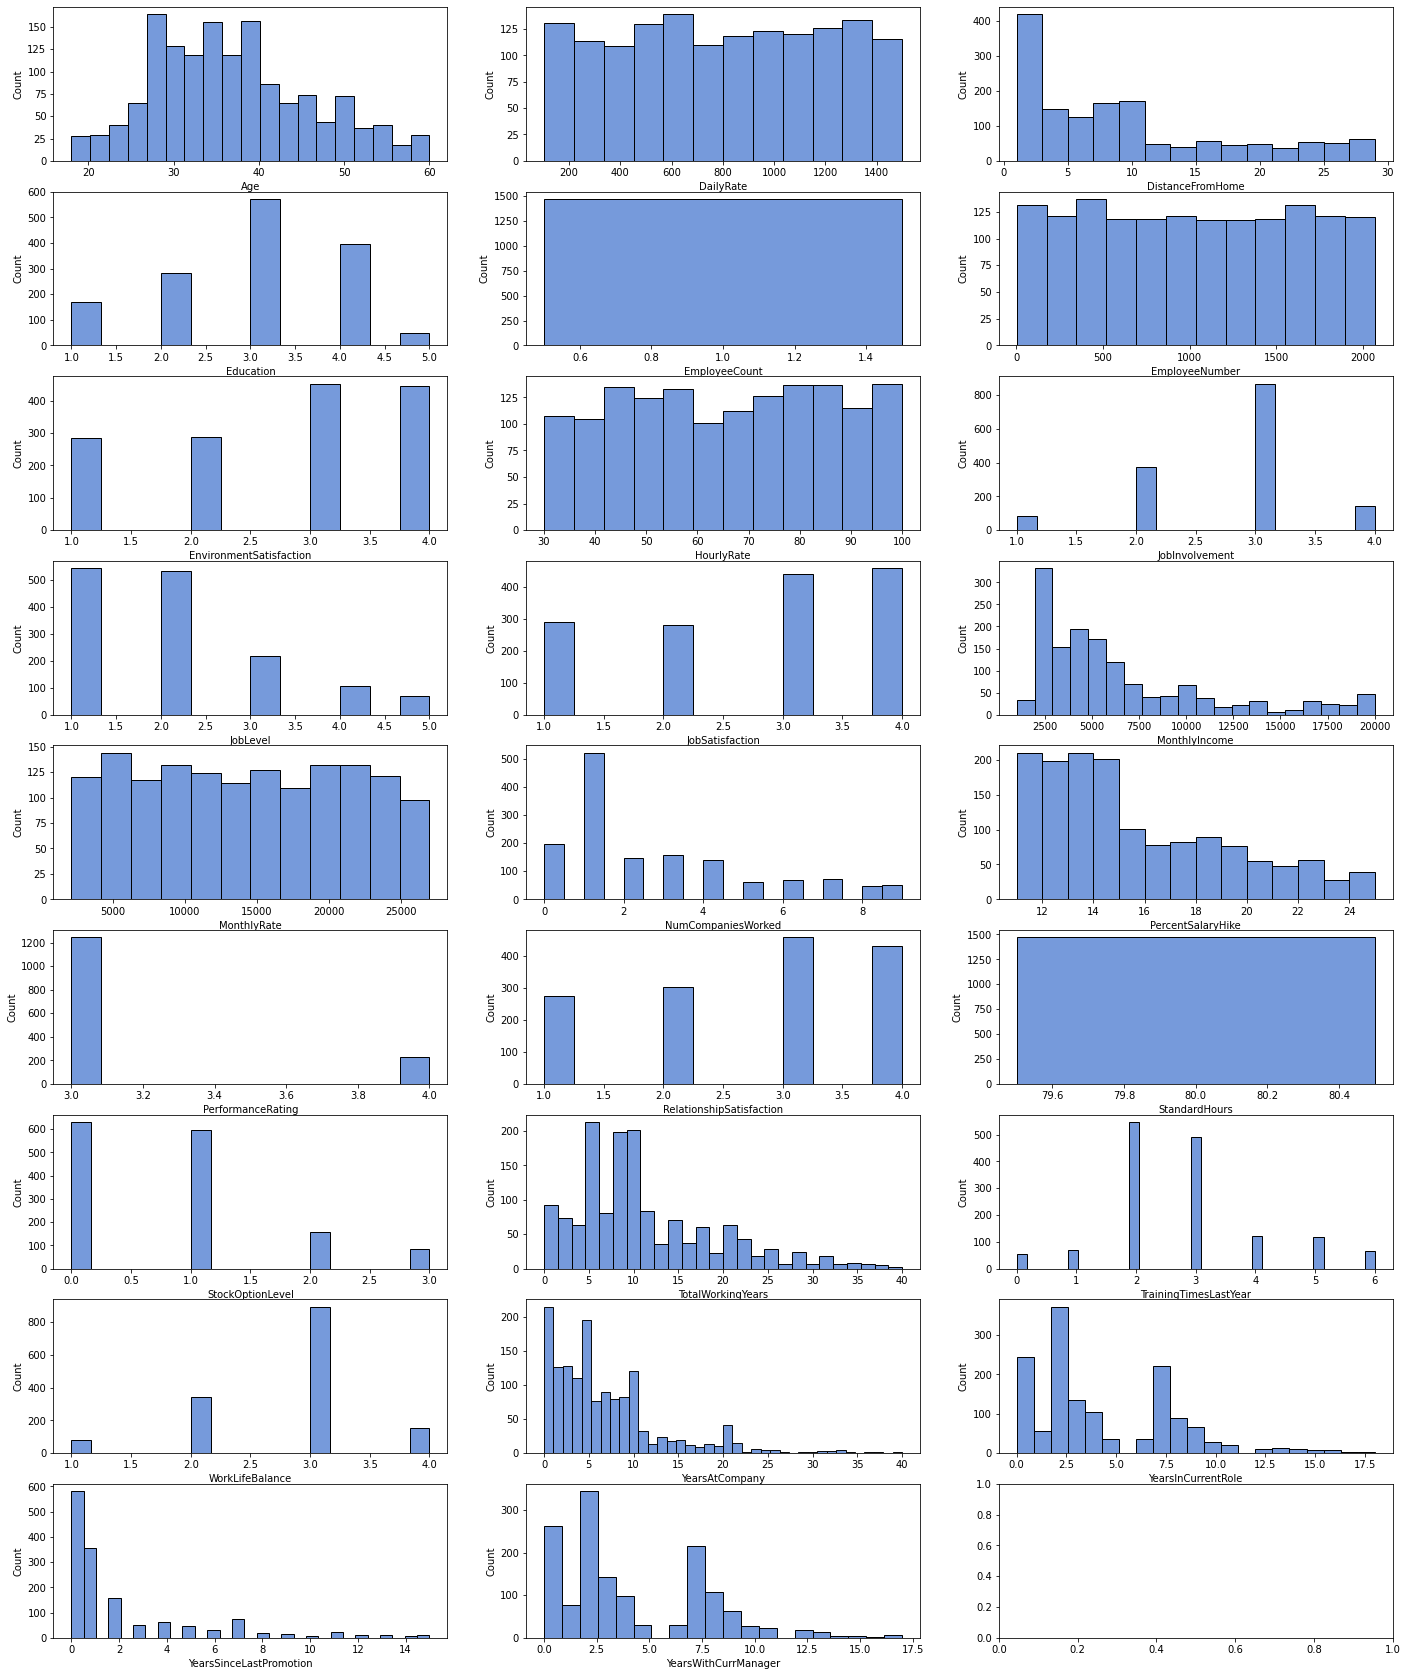

In [8]:
# num_cols 분포 확인

fig, axs = plt.subplots(ncols=3, nrows=9, figsize=(24,30))
for n, col in enumerate(num_cols):
    ax = axs[n // 3, n % 3]
    sns.histplot(data=data[col], ax=ax);
    
# PerformaceRating은 두개의 값만 가짐 -> 범주형 변수로 변경
# EmployeeCount,StandardHours 동일값 -> 변수 제거
# EmployeeNumber 직원 번호 , 고유한 변수 -> 변수 제거

In [9]:
# 의미 없는 범주형 변수 Over18 제거
df.drop(['Over18'], axis=1, inplace=True)
# 의미 없는 수치형 변수 EmployeeCount,EmployeeNumber,StandardHours 제거
df.drop(['EmployeeCount','StandardHours','EmployeeNumber'], axis=1, inplace=True)
# PerformanceRating 범주형 변수로 변환
df['PerformanceRating']=df['PerformanceRating'].astype('object')

In [10]:
# 최종 변수
num_cols = df.select_dtypes(include=['int64']).columns.tolist() # 22
cat_cols = df.select_dtypes(include=['object']).columns.tolist() # 9

---

### 결측치, 이상치 검토
* 결측치

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [12]:
df.isnull().sum() # 결측치 존재하지 않음

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [13]:
df.duplicated().sum() # 중복 데이터 존재하지 않음

0

* 이상치

In [14]:
def outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    cut_off = iqr * 1.5 
    lower, upper = q1 - cut_off, q3 + cut_off 
    return df[(df[col] < lower)|(df[col] > upper)]

In [15]:
# 수치형 변수에 대한 이상치 탐색
remove_col=[]
print("컬럼별 이상치 개수")
for i in num_cols:
    print(i,":",outlier(df,i).shape[0]) #열별 이상치 개수 합
    if outlier(df,i).shape[0]>0:
        remove_col.append(i)

컬럼별 이상치 개수
Age : 0
DailyRate : 0
DistanceFromHome : 0
Education : 0
EnvironmentSatisfaction : 0
HourlyRate : 0
JobInvolvement : 0
JobLevel : 0
JobSatisfaction : 0
MonthlyIncome : 114
MonthlyRate : 0
NumCompaniesWorked : 52
PercentSalaryHike : 0
RelationshipSatisfaction : 0
StockOptionLevel : 85
TotalWorkingYears : 63
TrainingTimesLastYear : 238
WorkLifeBalance : 0
YearsAtCompany : 104
YearsInCurrentRole : 21
YearsSinceLastPromotion : 107
YearsWithCurrManager : 14


In [16]:
remove_col #이상치 존재 컬럼 리스트

['MonthlyIncome',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
# 이상치 제거 함수
def remove(df,col):
    for i in col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        cut_off = iqr * 1.5
        lower, upper = q1 - cut_off, q3 + cut_off 
        df=df[(df[i]>lower)&(df[i]<upper)]
        df=df.reset_index(drop=True)
    return df       

In [18]:
# df=remove(df,remove_col) #이상치 포함 행 제거
# (시각화에서 Age 또는 Joblevel이 높은 대상들이 배제돼 인사이트를 도출하기 힘들어 편의상 생략)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


---

### Target : Attrition ( 퇴사 여부 )

In [19]:
# 퇴사 여부 분포 확인
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x24115691a60>,
 [Text(-1.0056140220003909, 0.5578892710531345, 'No'),
  Text(1.0056140220003906, -0.5578892710531345, 'Yes')],
 [Text(-0.5683905341741339, 0.3153287184213368, '83.9%'),
  Text(0.5683905341741339, -0.31532871842133686, '16.1%')])

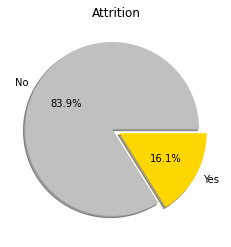

In [20]:
labels=['No','Yes']
explode = [0.05, 0.05]
colors = ['silver', 'gold']
plt.title('Attrition')
plt.pie(df['Attrition'].value_counts(),labels=labels,autopct='%.1f%%', explode=explode, shadow=True, colors=colors)

#### 가설 설정 : 퇴사 요인 예측
   
   - 월 급여가 낮을수록 퇴사율이 높을 것이다
        + MonthlyIncome : 월 급여
        
   <br>
   - 경력과 근속 연수가 적은 직책이 낮은 직원들의 퇴사율이 높을 것이다
        + JobLevel: 직책
        + YearsInCurrentRole : 현재 역할 년수
        + YearsAtCompany : 근속 연수
        + TotalWorkingYears : 경력 기간
   
   <br> 
   - 집과 회사의 거리가 멀수록 퇴사율이 높을 것이다
        + DistanceFromHome :집과의 거리

   <br>
   - 부서별 퇴사율 파악
        + Department : 업무 분야
        + JobRole : 업무 종류
   

---

### 변수 상관관계 파악

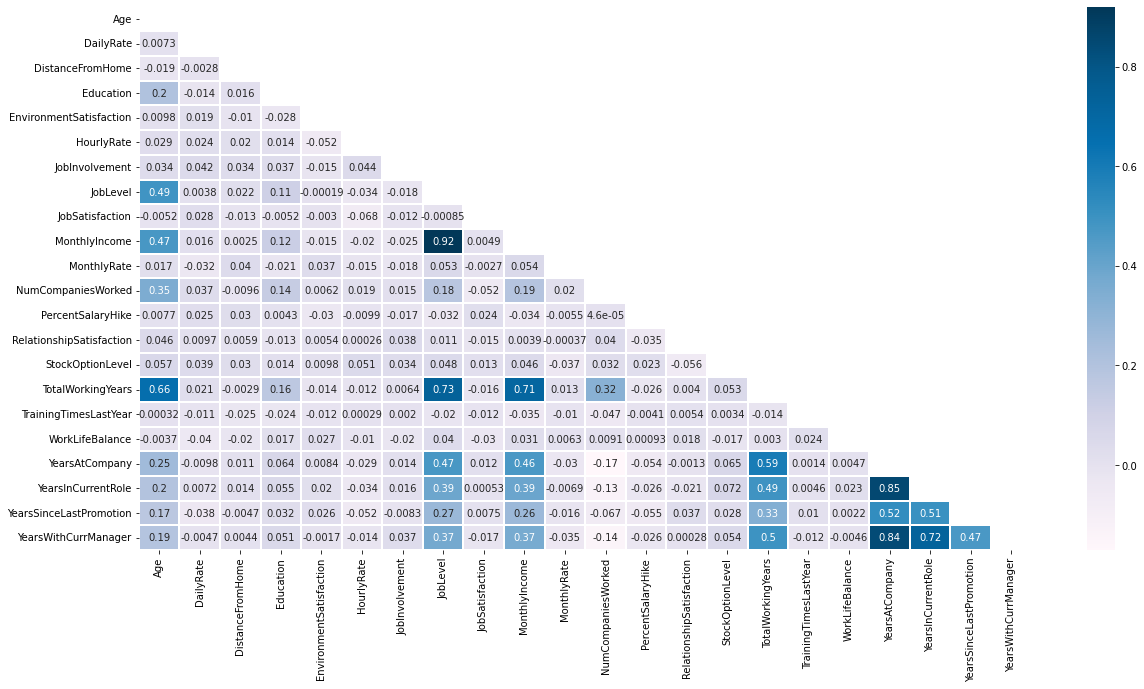

In [21]:
heatmap_data = df[num_cols].corr(method = 'spearman') # 분포 그래프로 정규성 만족X 확인
colormap = plt.cm.PuBu

mask = np.zeros_like(heatmap_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20,10))
sns.heatmap(data = heatmap_data, mask=mask,annot = True,linewidths=.1, cmap = colormap)
plt.show()

In [22]:
corr = df[num_cols].corr(method = 'spearman').unstack().sort_values(ascending=False).drop_duplicates().drop_duplicates()
corr.drop(corr.index[0],inplace=True)
display(corr.head(10)) #상관관계 높은 수치형 변수 10쌍
display(corr.tail(5)) #상관관계 낮은 수치형 변수 5쌍

MonthlyIncome         JobLevel                   0.920429
YearsInCurrentRole    YearsAtCompany             0.854000
YearsWithCurrManager  YearsAtCompany             0.842803
JobLevel              TotalWorkingYears          0.734678
YearsWithCurrManager  YearsInCurrentRole         0.724754
MonthlyIncome         TotalWorkingYears          0.710024
TotalWorkingYears     Age                        0.656896
YearsAtCompany        TotalWorkingYears          0.594193
                      YearsSinceLastPromotion    0.519966
YearsInCurrentRole    YearsSinceLastPromotion    0.505657
dtype: float64

NumCompaniesWorked  YearsSinceLastPromotion   -0.066950
JobSatisfaction     HourlyRate                -0.068340
NumCompaniesWorked  YearsInCurrentRole        -0.127673
                    YearsWithCurrManager      -0.144129
YearsAtCompany      NumCompaniesWorked        -0.171070
dtype: float64

* 가장 상관관계가 높은 5쌍<br>
    + JobLevel(직책)  ,            MonthlyIncome(월급) :        0.865441
    + YearsInCurrentRole(직무수행기간) ,   YearsAtCompany(근속 연수) :       0.824364
    + YearsWithCurrManager(현재 상사와 직무수행기간) , YearsAtCompany(근속 연수)  :      0.780565
    + YearsWithCurrManager(현재 상사와 직무수행기간),  YearsInCurrentRole(직무수행기간):    0.654107
    + JobLevel(직책)        ,      TotalWorkingYears(전체 근무 경력)  :   0.611213

<br>대부분 일한 기간과 관련된 변수들이 상관관계가 높게 나타남 :<br> 일을 한 기간이 오래 될수록 월급이나 직책이 높아짐
<br>
<br>
**[요인 1. 월 급여에 따른 퇴사 여부]** 와   **[요인 2. 경력과 근속연수, 직책]**이 상관관계가 있음을 알 수 있음

---

###  시각화

#### 1. 월 급여에 따른 퇴사 여부
   + MonthlyIncome : 월 급여

C:\Users\Kim Eun ho\AppData\Local\Temp\ipykernel_9588\638515002.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'],ax=ax[0,0])
C:\Users\Kim Eun ho\AppData\Local\Temp\ipykernel_9588\638515002.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyRate'],ax=ax[0,1])
C:

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

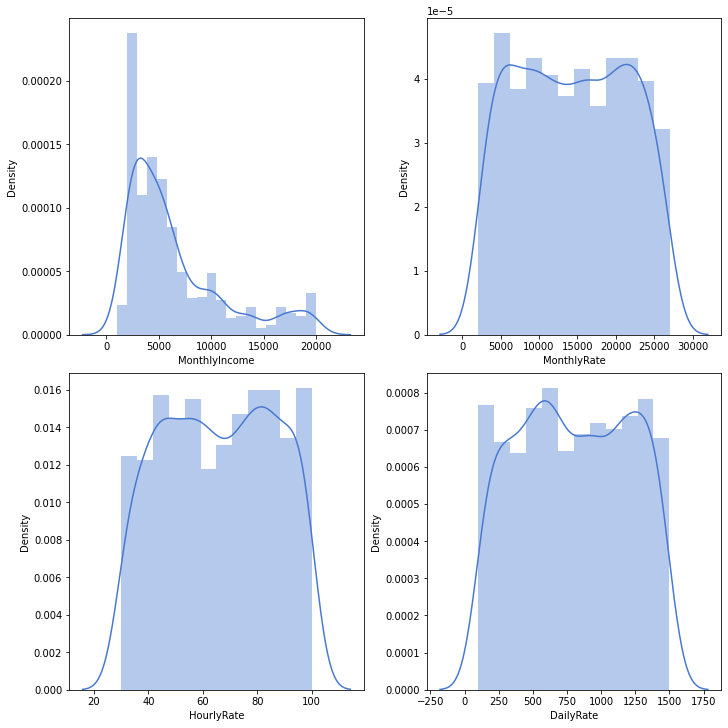

In [23]:
# 급여 분포 확인
fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(10,10),constrained_layout=True)
sns.distplot(df['MonthlyIncome'],ax=ax[0,0])
sns.distplot(df['MonthlyRate'],ax=ax[0,1])
sns.distplot(df['HourlyRate'],ax=ax[1,0])
sns.distplot(df['DailyRate'],ax=ax[1,1])

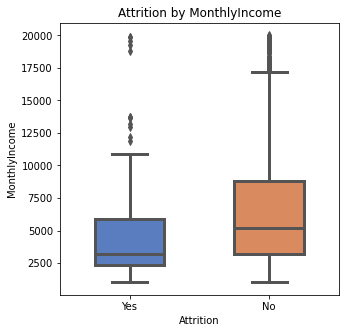

In [24]:
# 월급여에 따른 퇴사 여부 
plt.figure(figsize = (5,5))
plt.title('Attrition by MonthlyIncome')
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome',width = 0.5, linewidth = 3,data = df)
plt.show()

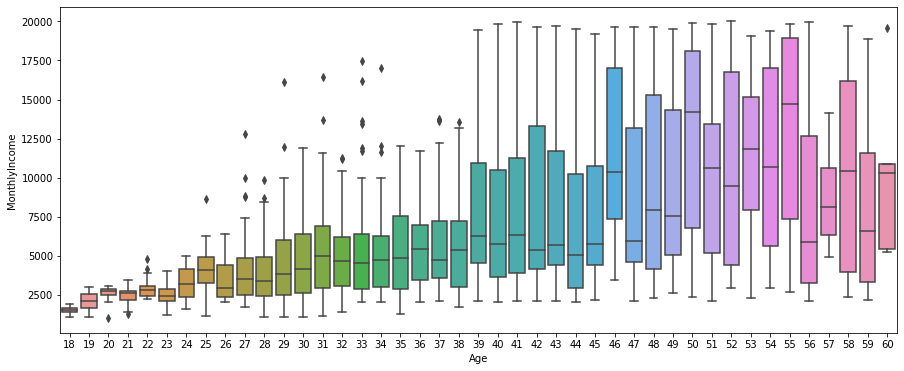

In [25]:
# 나이에 따른 월급여
plt.figure(figsize = (15, 6))
sns.boxplot(data=df, x = 'Age', y = 'MonthlyIncome');

- 월급여가 낮은 사람들이 퇴사를 하는 경향을 확인할 수 있다.
- 퇴사를 하지 않은 사람들의 월급여 중앙값이 비교적 크며 Box의 크기가 큰 것으로 보아 분산이 크다.(데이터의 불균형으로 84%로 대상자가 많다)
- 정년 퇴직자로 예상되는 이상치를 고려하여도 퇴사자의 월 급여가 더욱 적은 것을 확인할 수 있다.

<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

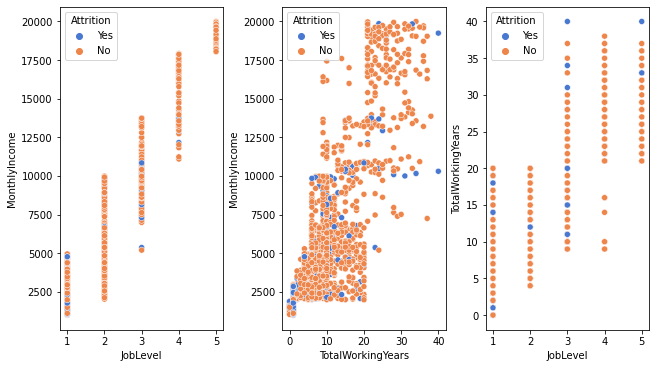

In [26]:
fig, ax = plt.subplots(ncols=3,figsize=(9,5),constrained_layout=True)
sns.scatterplot(y=df.MonthlyIncome,x=df.JobLevel,hue=df.Attrition,ax=ax[0])
sns.scatterplot(y=df.MonthlyIncome,x=df.TotalWorkingYears,hue=df.Attrition,ax=ax[1])
sns.scatterplot(y=df.TotalWorkingYears,x=df.JobLevel,hue=df.Attrition,ax=ax[2])

<Figure size 648x432 with 0 Axes>

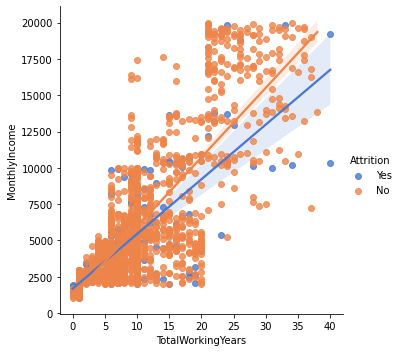

In [27]:
# 상단의 가운데 scatter plot인 YearsAtCompany , Joblevel 
plt.figure(figsize = (9, 6))
sns.lmplot(data=df, x = 'TotalWorkingYears', y = 'MonthlyIncome',hue='Attrition');

- 상관관계가 확인된 Joblevel - MonthlyIncome, TotalWorkingYears - MonthlyIncome ScatterPlot을 살펴보면 다음과 같이 예상할 수 있다<br>
    - 일반 직원: Joblevel >= 3, TotalWorkingYears <= 20 인 대부분의 직원 <br>
    - 고위직 지원:Joblevel>=4, TotalWorkingYears >=20 으로 근속연수와 직책이 높은 고위직 직원
  <br>

- 고위직 직원들 중 퇴사자는 TotalWorkingYears가 데이터 중 최대로 정년 퇴직자임을 예상 <br>
- TotalWorkingYears - MonthlyIncome Scatterplot을 살펴보면 <br>
    - 일반 직원 중 퇴사자는 월 급여가 낮은 신입 직원이거나 MonthlyIncome이 10000 근방에 위치하는 등 비교적 고르게 분포
    - 근속연수가 20년 이상인 직원 중 퇴사자는 MonthlyIncome의 분포가 최저이거나 최대로, 양극에 분포 

<br>*-> 직원을 클러스터링을 통해 군집화하여 군집별로 그 퇴직 이유 분석*

#### 2. 경력에 따른 퇴사 여부 (경력에 따른 업무 성과 확인)
   + JobLevel: 직책
   + YearsInCurrentRole : 현재 역할 년수
   + YearsAtCompany : 근속 연수
   + TotalWorkingYears : 경력 기간

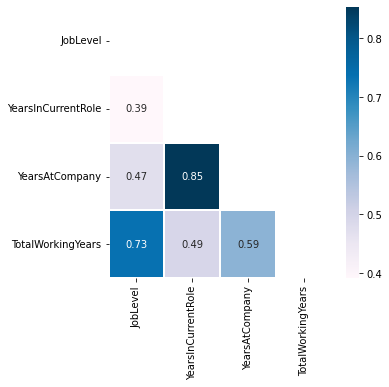

In [28]:
cols=['JobLevel','YearsInCurrentRole','YearsAtCompany','TotalWorkingYears']
heatmap_data = df[cols].corr(method = 'spearman') 
colormap = plt.cm.PuBu

mask = np.zeros_like(heatmap_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (5,5))
sns.heatmap(data = heatmap_data, mask=mask,annot = True,linewidths=.1, cmap = colormap)
plt.show()

* 해당 회사 근속 연수가 아닌 전체 경력 기간이 길수록 직책(직급)이 높다는 것을 알 수 있고, <br>
* 근속 연수와 현재 역할 년수의 상관관계가 매우 높은 것으로 보아 해당 회사에서의 역할 변경은 크게 없어<br> 두 변수 중 경력기간과 상관 관계가 높은 YearsAtCompany만 사용

<br>*-> YearsAtCompany , Joblevel 변수와 퇴사 여부 분석*

<Figure size 576x432 with 0 Axes>

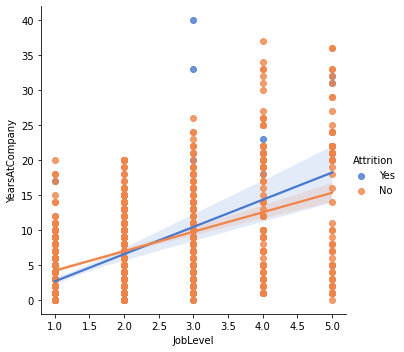

In [29]:
# YearsAtCompany , Joblevel 
plt.figure(figsize = (8, 6))
sns.lmplot(data=df, x = 'JobLevel', y = 'YearsAtCompany',hue='Attrition');

In [32]:
df['Attrition'] = df.Attrition == 'Yes'

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Attrition'>

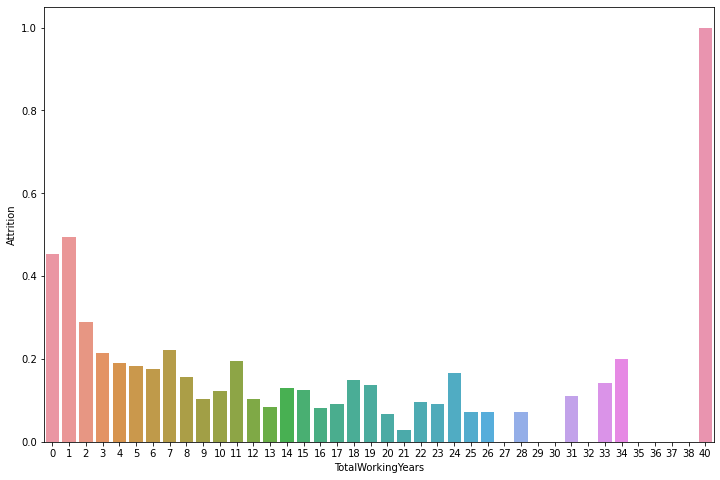

In [44]:
# TotalWorkingYears - 경력에 따른 퇴사율 확인
plt.figure(figsize=(12,8))
sns.barplot(x=df.TotalWorkingYears,y=df.Attrition,ci=None)

- 경력이 1년 이하인 경우 초기 경력자, 경력이 40년 이상인 경우 정년 퇴직자

#### 파생변수 생성

In [43]:
#초기 경력자 파생변수 생성
df['LowWorkingYears'] = np.where(df.TotalWorkingYears <=1, 1,0)
df['LowWorkingYears'] = df['LowWorkingYears'].astype(object)

In [34]:
# 근속 여부 파생변수 생성
# 전체 근무 경력이 현재 회사 근무 경력과 동일한 경우
# 해당 회사에서 계속 일했음을 알 수 있고 동일 여부를 파생 변수 Constant로 저장
df['Constant']='No'
df.loc[df['TotalWorkingYears'] == df['YearsAtCompany'],'Constant']='Yes'
df['Constant'] = df['Constant'].astype(object)

#### 3. 통근 거리에 따른 퇴사 여부
 + DistanceFromHome :집과의 거리

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

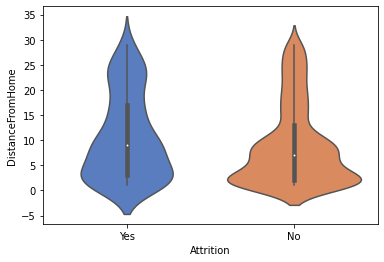

In [30]:
sns.violinplot(x=df.Attrition,y=df.DistanceFromHome)

- 퇴사자의 비율이 약 18%로 데이터 수가 적음에도 퇴사자의 분포를 확인해보면 <br>집과의 거리가 먼 직원들이 비교적 많이 분포함을 확인할 수 있다.

#### 4. 부서별 퇴사 여부
+ Department : 업무 분야
+ JobRole : 업무 종류

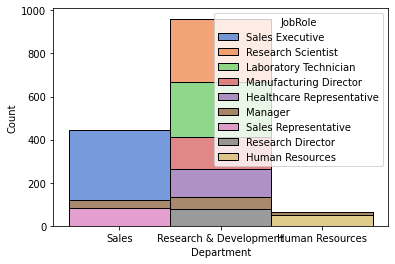

In [31]:
sns.histplot(data=df,x=df.Department,multiple='stack',hue=df.JobRole)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

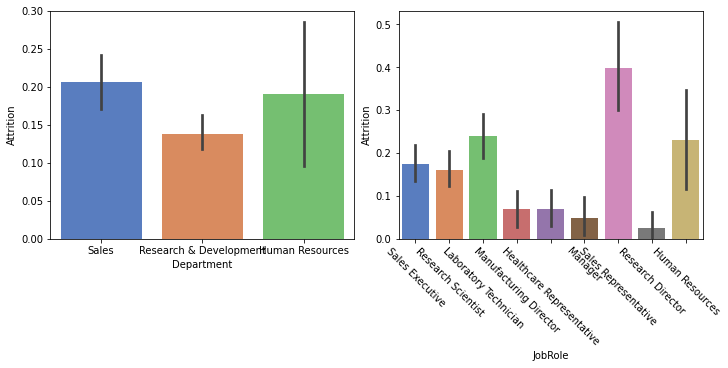

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5),constrained_layout=True)
sns.barplot(x=df.Department,y=df.Attrition,ax=ax[0])
sns.barplot(x=df.JobRole,y=df.Attrition,ax=ax[1])
plt.xticks(rotation=-45)

- Research & Development Department 부서의 직원 수가 약 1000명으로, 그 외 부서를 합한 수보다 많다
- Sales 부서가 퇴사율이 가장 높다.
- Sales 부서의 Sales Representative Manager 직무 종사자의 퇴사율이 높음을 그 요인으로 들 수 있다.

<br> *-> 해당 Sales 부서의 Sales Representative Manager 데이터 분석*